In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data_sets = pd.read_csv('./cow.csv')
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [3]:
feture_cols = ['surgery', 'age', 'temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion','abdomo_protein' ,'outcome Class']
df = data_sets[feture_cols]
df.loc[df.surgery == 'no', 'surgery'] = 0
df.loc[df.surgery == 'yes', 'surgery'] = 1

df.loc[df.age == 'young', 'age'] = 0
df.loc[df.age == 'adult', 'age'] = 1

df.loc[df.temperature.isnull(), 'temperature'] = 37.8
df.loc[df.pulse.isnull(), 'pulse'] = 35
df.loc[df.abdomo_protein.isnull(), 'abdomo_protein'] = 3
df = df.drop(df[df.isnull().sum(axis=1) > 0].index)
df

,surgery,age,temperature,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion,abdomo_protein,outcome Class
0,0,1,38.5,66.0,28.0,45.0,8.4,11300,3.0,died
1,1,1,39.2,88.0,20.0,50.0,85.0,2208,2.0,euthanized
2,0,1,38.3,40.0,24.0,33.0,6.7,0,3.0,lived
3,1,0,39.1,164.0,84.0,48.0,7.2,2208,5.3,died
4,0,1,37.3,104.0,35.0,74.0,7.4,4300,3.0,died
...,...,...,...,...,...,...,...,...,...,...
293,0,1,38.5,40.0,16.0,37.0,67.0,0,3.0,lived
294,1,1,37.8,120.0,70.0,55.0,65.0,3205,3.0,euthanized
296,1,1,37.5,72.0,30.0,60.0,6.8,3205,3.0,died
297,1,1,36.5,100.0,24.0,50.0,6.0,2208,3.4,lived


In [4]:
df['outcome Class'].value_counts()

lived         138
died           52
euthanized     31
Name: outcome Class, dtype: int64

In [5]:
X = df
y = X['outcome Class'].values
X = X.drop(['outcome Class'], axis=1)

In [6]:
y[y=='lived'] = 1
y[y=='died'] = 2
y[y=='euthanized'] = 3
y = y.astype('int')

In [7]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
y_train = y_train.astype('int')

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
dtree_gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dtree_gscv.fit(X_train, y_train)
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [10]:
y_pred = dtree_gscv.predict(X_test)

In [11]:
np.sum(y_pred == y_test)/y_test.size

0.8260869565217391

In [12]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3]), array([121,  48,  29], dtype=int64))

In [13]:
np.unique(y_test, return_counts=True)

(array([1, 2, 3]), array([17,  4,  2], dtype=int64))

[Text(0.45689655172413796, 0.9, 'x[5] <= 50.5\ngini = 0.546\nsamples = 198\nvalue = [121, 48, 29]'),
 Text(0.1896551724137931, 0.7, 'x[3] <= 73.5\ngini = 0.398\nsamples = 147\nvalue = [111, 23, 13]'),
 Text(0.06896551724137931, 0.5, 'x[7] <= 2164.5\ngini = 0.273\nsamples = 110\nvalue = [93, 8, 9]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.10344827586206896, 0.3, 'x[2] <= 38.15\ngini = 0.435\nsamples = 62\nvalue = [45, 8, 9]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.578\nsamples = 35\nvalue = [20, 6, 9]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.137\nsamples = 27\nvalue = [25, 2, 0]'),
 Text(0.3103448275862069, 0.5, 'x[6] <= 7.85\ngini = 0.587\nsamples = 37\nvalue = [18, 15, 4]'),
 Text(0.2413793103448276, 0.3, 'x[6] <= 6.35\ngini = 0.541\nsamples = 26\nvalue = [9, 15, 2]'),
 Text(0.20689655172413793, 0.1, 'gini = 0.547\nsamples = 17\nvalue = [9, 7, 1]'),
 Text(0.27586206896551724, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [0, 8, 1]'

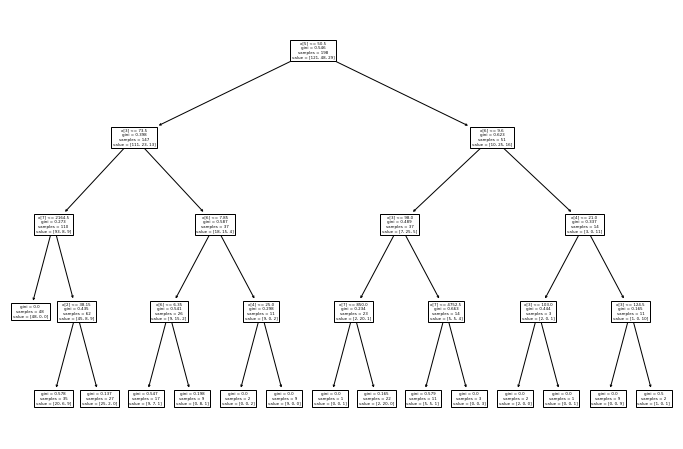

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

dtree_model = DecisionTreeClassifier(criterion='gini', max_depth=4)
plt.figure(figsize=(12,8))
tree.plot_tree(dtree_model.fit(X_train, y_train))

In [15]:
y_pred = dtree_model.predict(X_test)
np.sum(y_pred == y_test)/y_test.size

0.8260869565217391